<a href="https://colab.research.google.com/github/ucfilho/marquesgabi_set_2020/blob/master/PSD_USA_ROTINAS_set_23_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import zipfile
#import random
from random import randint
from PIL import Image
import re
from sklearn.model_selection import train_test_split
#import scikit-image
import skimage
import pandas as pd

In [ ]:
!pip install mahotas

In [ ]:
import mahotas.features.texture as mht
import mahotas.features

In [ ]:
!git clone https://github.com/ucfilho/marquesgabi_fev_2020 #clonar do Github
%cd marquesgabi_fev_2020
import Go2BlackWhite
import Go2Mahotas

Cloning into 'marquesgabi_fev_2020'...
remote: Enumerating objects: 73, done.
remote: Counting objects: 100% (73/73), done.
remote: Compressing objects: 100% (71/71), done.
remote: Total 73 (delta 37), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (73/73), done.
/content/marquesgabi_fev_2020/Doutorado/marquesgabi_set_2020/Doutorado/marquesgabi_fev_2020


In [ ]:
!git clone https://github.com/marquesgabi/Doutorado
%cd Doutorado

Transfere='Fotos_Grandes_3cdAmostra.zip'
file_name = zipfile.ZipFile(Transfere, 'r')
file_name.extractall()

Cloning into 'Doutorado'...
remote: Enumerating objects: 30, done.
remote: Counting objects: 100% (30/30), done.
remote: Compressing objects: 100% (30/30), done.
remote: Total 280 (delta 11), reused 0 (delta 0), pack-reused 250
Receiving objects: 100% (280/280), 77.76 MiB | 22.15 MiB/s, done.
Resolving deltas: 100% (134/134), done.
/content/marquesgabi_fev_2020/Doutorado/marquesgabi_set_2020/Doutorado/marquesgabi_fev_2020/Doutorado


In [ ]:
Size=1200 # tamanho da foto
ww,img_name=Go2BlackWhite.BlackWhite(Transfere,Size) #Pegamos a primeira foto Grande
img=ww[0] 
# this is the big image we want to segment 
# ww[0], change it if you want to segment another picture

In [ ]:
!git clone https://github.com/marquesgabi/Doutorado
# %cd Doutorado
Transfere='FotosTreino882_and_Segm.zip'
file_name = zipfile.ZipFile(Transfere, 'r')
file_name.extractall()

"""# First step: get the segmented file (photos stored in csv file)"""

labels = [] #name files

with zipfile.ZipFile(Transfere, "r") as f:
  for f in f.namelist():
    labels.append(f)

Num=len(labels)
df=pd.read_csv(labels[0])
for i in range(1,Num):
  df_new=pd.read_csv(labels[i])
  df_new = df_new[~df_new['Type'].isin(['G'])] # drop grain row which is not in 882
  frames = [df, df_new]
  df= pd.concat(frames, ignore_index=True)

Cloning into 'Doutorado'...
remote: Enumerating objects: 30, done.
remote: Counting objects: 100% (30/30), done.
remote: Compressing objects: 100% (30/30), done.
remote: Total 280 (delta 11), reused 0 (delta 0), pack-reused 250
Receiving objects: 100% (280/280), 77.76 MiB | 22.67 MiB/s, done.
Resolving deltas: 100% (134/134), done.


In [ ]:
!git clone https://github.com/ucfilho/marquesgabi_set_2020
%cd marquesgabi_set_2020

Cloning into 'marquesgabi_set_2020'...
remote: Enumerating objects: 188, done.
remote: Counting objects: 100% (188/188), done.
remote: Compressing objects: 100% (186/186), done.
remote: Total 188 (delta 115), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (188/188), 3.55 MiB | 6.83 MiB/s, done.
Resolving deltas: 100% (115/115), done.
/content/marquesgabi_fev_2020/Doutorado/marquesgabi_set_2020/Doutorado/marquesgabi_fev_2020/Doutorado/marquesgabi_set_2020


In [ ]:
from big_segment import Segmenta  # got image provided segmented
from ANN_FIND_GRAIN import AnnGrain  # got image provided segmented
from psd_mahotas import Mahotas

In [ ]:
!git clone https://github.com/marquesgabi/Doutorado
%cd Doutorado
Transfere='FotosTreino882_and_Segm.zip'
file_name = zipfile.ZipFile(Transfere, 'r')
file_name.extractall()

"""# First step: get the segmented file (photos stored in csv file)"""

labels = [] #name files

with zipfile.ZipFile(Transfere, "r") as f:
  for f in f.namelist():
    labels.append(f)

Num=len(labels)
ANN_dat=pd.read_csv(labels[0])
for i in range(1,Num):
  df_new=pd.read_csv(labels[i])
  df_new = df_new[~df_new['Type'].isin(['G'])] # drop grain row which is not in 882
  frames = [ANN_dat, df_new]
  ANN_dat= pd.concat(frames, ignore_index=True)

Cloning into 'Doutorado'...
remote: Enumerating objects: 30, done.
remote: Counting objects: 100% (30/30), done.
remote: Compressing objects: 100% (30/30), done.
remote: Total 280 (delta 11), reused 0 (delta 0), pack-reused 250
Receiving objects: 100% (280/280), 114.92 MiB | 22.98 MiB/s, done.
Resolving deltas: 100% (128/128), done.
/content/marquesgabi_fev_2020/Doutorado/marquesgabi_set_2020/Doutorado/marquesgabi_fev_2020/Doutorado/marquesgabi_set_2020/Doutorado


In [ ]:
df=Segmenta(img)


In [ ]:
print(df)

    Width           0           1  ...        781        782        783
0     198    0.162841    0.414447  ...   0.000000   0.000000   0.000000
1     146   67.598610   60.324829  ...  50.821171  48.138672  46.098892
2     118   70.103416   80.881355  ...  60.250786  52.902901  41.143063
3     180  104.999512   96.360008  ...  41.737286  39.904202  39.492348
4     153   95.251198   97.055283  ...  68.510101  69.286850  68.441544
..    ...         ...         ...  ...        ...        ...        ...
45    135   95.107040   96.644379  ...  83.477417  84.544525  83.362411
46    128   94.890625   91.076172  ...  73.331055  73.543945  73.211914
47    169  127.976257  111.000732  ...  83.227051  82.374603  84.421310
48    111   74.417175   91.655388  ...  87.386002  81.522682  39.738739
49    148   48.924030   48.555885  ...  79.035065  81.769188  89.324326

[150 rows x 785 columns]


In [ ]:
y_pred,confusion_matrix,METRICS=AnnGrain(ANN_dat,df.drop('Width',axis=1)) 


Epoch 1/200
11/11 [==============================] - 0s 3ms/step - loss: 4.2608 - accuracy: 0.4636
Epoch 2/200
11/11 [==============================] - 0s 2ms/step - loss: 2.2217 - accuracy: 0.5160
Epoch 3/200
11/11 [==============================] - 0s 2ms/step - loss: 3.1630 - accuracy: 0.4956
Epoch 4/200
11/11 [==============================] - 0s 2ms/step - loss: 3.5651 - accuracy: 0.4956
Epoch 5/200
11/11 [==============================] - 0s 2ms/step - loss: 2.6807 - accuracy: 0.4956
Epoch 6/200
11/11 [==============================] - 0s 2ms/step - loss: 1.4194 - accuracy: 0.4956
Epoch 7/200
11/11 [==============================] - 0s 2ms/step - loss: 0.5187 - accuracy: 0.7376
Epoch 8/200
11/11 [==============================] - 0s 3ms/step - loss: 1.3136 - accuracy: 0.4956
Epoch 9/200
11/11 [==============================] - 0s 2ms/step - loss: 1.3029 - accuracy: 0.4956
Epoch 10/200
11/11 [==============================] - 0s 2ms/step - loss: 0.4443 - accuracy: 0.7318
Epoch 11/

In [ ]:
y_pred,confusion_matrix,METRICS=AnnGrain(ANN_dat,df.drop('Width',axis=1)) 


Epoch 1/200
11/11 [==============================] - 0s 2ms/step - loss: 5.0749 - accuracy: 0.4519
Epoch 2/200
11/11 [==============================] - 0s 2ms/step - loss: 0.7420 - accuracy: 0.4956
Epoch 3/200
11/11 [==============================] - 0s 2ms/step - loss: 0.6397 - accuracy: 0.6297
Epoch 4/200
11/11 [==============================] - 0s 2ms/step - loss: 0.5750 - accuracy: 0.4956
Epoch 5/200
11/11 [==============================] - 0s 2ms/step - loss: 0.5175 - accuracy: 0.6210
Epoch 6/200
11/11 [==============================] - 0s 2ms/step - loss: 0.3758 - accuracy: 0.6910
Epoch 7/200
11/11 [==============================] - 0s 2ms/step - loss: 0.4684 - accuracy: 0.6560
Epoch 8/200
11/11 [==============================] - 0s 2ms/step - loss: 0.3411 - accuracy: 0.8076
Epoch 9/200
11/11 [==============================] - 0s 2ms/step - loss: 0.4871 - accuracy: 0.5569
Epoch 10/200
11/11 [==============================] - 0s 2ms/step - loss: 0.4812 - accuracy: 0.8105
Epoch 11/

In [ ]:
#print(confusion_matrix)

In [ ]:
#print(METRICS)

In [ ]:
#print(y_pred.ravel())

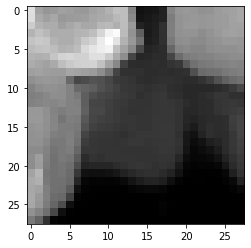

In [ ]:
Size=28
qual_img=8
data=np.array(df.drop('Width',axis=1).iloc[qual_img]).reshape(Size,Size)
img = Image.fromarray(data.astype('uint8'), mode='L')
img=np.float32(img)
img28=cv2.resize(img,(Size,Size), interpolation = cv2.INTER_AREA)
Foto=np.array(img28).reshape(28,28)
plt.imshow(Foto, cmap = "gray")

In [ ]:
Escolha=['ASM', 'constrast', 'correl', 'variance', 'inv diff mom', 'sum aveg', 
         'sum var', 'sum entropy', 'entropy', 'dif var', 'dif entropy', 
         'IMC1', 'IMC2']

Prop=Escolha[1] 

In [ ]:
Width_All=df['Width']
df=df.drop('Width',axis=1)
df_mahotas=Mahotas(Prop,df,Width_All)
print(df_mahotas)

KeyError: ignored

In [ ]:
print(Width_All)

In [ ]:
df.shape